## Pre-processing of the Dataset "Avocado prices"

Goal:

- Create a new data set that can fit different kind of models, by removing the "NaN" and "String" variables.
- Get RMSE of different models to compare later with generated models

Avocado data set

Characteristics:
    - Number of instances: 18246
    - Number of attributes: 13
    - Attribute information:
        "Date": The date of the observation
        "AveragePrice":  the average price of a single avocado
        "Type": conventional or organic
        "Year": the year
        "Region": the city or region of the observation
        "Total Volume": Total number of avocados sold
        "4046": Total number of avocados with PLU 4046 sold
        "4225": Total number of avocados with PLU 4225 sold
        "4770": Total number of avocados with PLU 4770 sold
        "Total bags": Total number of bags sold
        "Small bags": Total number of small bags sold
        "Large bags": Total number of large bags sold
        "XLarge bags": Total number of XLarge bags sold
        
This is a copy of the Avocado prices dataset: https://www.kaggle.com/neuromusic/avocado-prices
"This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV"

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## Exploring the Avocado "prices" data set

### 1. Importing the data set

In [2]:
df = pd.read_csv('../Data/avocado_price/avocado.csv')
original_df = df
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

### 2. Data pre-processing

#### Missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


There is no missing values

#### String values

First, we split the date in 2 smaller columns for the day and the month ( the year is aleady provided )

In [6]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [7]:
df = df.drop(['Date'],axis=1)

We create a fonction allowing us to create "dummie features" to split string features in categoricals features and use it on the "Type" feature

In [8]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

df = create_dummies(df,'type').drop('type',axis=1)


We map each region with a number

In [9]:
df_region = df
mapping = {'Albany' : '0' , 'Atlanta' : '1' , 'BaltimoreWashington' : '2' , 'Boise' : '3' , 'Boston' : '4' ,'BuffaloRochester' : '5' , 'California' : '6' , 'Charlotte' : '7' , 'Chicago' : '8' ,'CincinnatiDayton' : '9' , 'Columbus' : '10' , 'DallasFtWorth' : '11' , 'Denver' : '12' ,'Detroit' : '13' , 'GrandRapids' : '14' , 'GreatLakes' : '15' , 'HarrisburgScranton' : '16' ,'HartfordSpringfield' : '17' , 'Houston' : '18' , 'Indianapolis' : '19' , 'Jacksonville' : '20' ,'LasVegas' : '21' , 'LosAngeles' : '22' , 'Louisville' : '23' , 'MiamiFtLauderdale' : '24' ,'Midsouth' : '25' , 'Nashville' : '26' , 'NewOrleansMobile' : '27' , 'NewYork' : '28' ,'Northeast' : '29' , 'NorthernNewEngland' : '30' , 'Orlando' : '31' , 'Philadelphia' : '32' ,'PhoenixTucson' : '33' , 'Pittsburgh' : '34' , 'Plains' : '35' , 'Portland' : '36' ,'RaleighGreensboro' : '37' , 'RichmondNorfolk' : '38' , 'Roanoke' : '39' , 'Sacramento' : '40' ,'SanDiego' : '41' , 'SanFrancisco' : '42' , 'Seattle' : '43' , 'SouthCarolina' : '44' ,'SouthCentral' : '45' , 'Southeast' : '46' , 'Spokane' : '47' , 'StLouis' : '48' , 'Syracuse' : '49' ,'Tampa' : '50' , 'TotalUS' : '51' , 'West' : '52' , 'WestTexNewMexico' : '53'}
df.region = df.region.map(mapping)
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,type_conventional,type_organic
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,12,27,1,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,12,20,1,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,12,13,1,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,12,6,1,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,11,29,1,0


We change the float values to int, those values are prices, wich means that we have just have to change the scale to cents.

In [10]:
for x in df.columns:
    if (df[x].dtype == 'float64'):
        df[x] = (df[x]*100).astype(int)
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,type_conventional,type_organic
0,0,133,6423662,103674,5445485,4816,869687,860362,9325,0,2015,0,12,27,1,0
1,1,135,5487698,67428,4463881,5833,950556,940807,9749,0,2015,0,12,20,1,0
2,2,93,11822022,79470,10914967,13050,814535,804221,10314,0,2015,0,12,13,1,0
3,3,108,7899214,113200,7197641,7258,581116,567740,13376,0,2015,0,12,6,1,0
4,4,128,5103960,94148,4383839,7578,618395,598626,19769,0,2015,0,11,29,1,0


### Exploratory Data Analysis

Text(0.5, 1.0, 'Average Price')

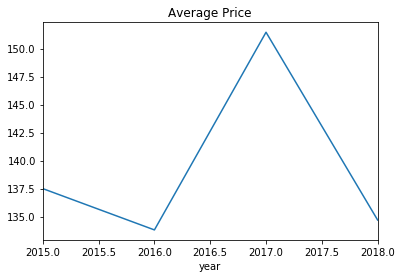

In [11]:
byDate=df.groupby('year').mean()
plt.figure()
byDate['AveragePrice'].plot()
plt.title('Average Price')

The average price peaked in 2017 and is much lower otherwise

Text(0.5, 1.0, 'Average Price Per Month')

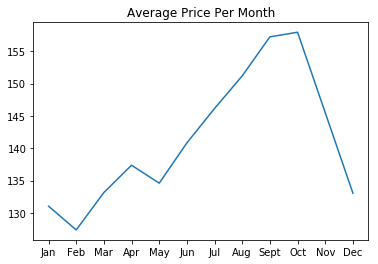

In [12]:
byMonth = df.groupby("Month").mean()
plt.figure()
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['AveragePrice'])
plt.title('Average Price Per Month')

The price keep increasing from February to October and then decrease fast

Text(0.5, 1.0, 'Average Price Per Day')

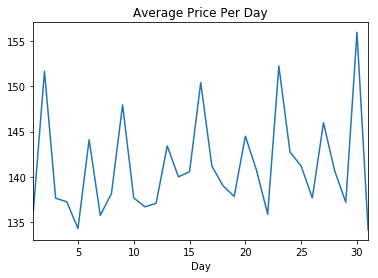

In [13]:
byDay = df.groupby("Day").mean()
plt.figure()
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')

The price keep varying from one day to another, which seems to imply that if the price is high one day, you can wait the day after tommorow for it to decrease significantly.

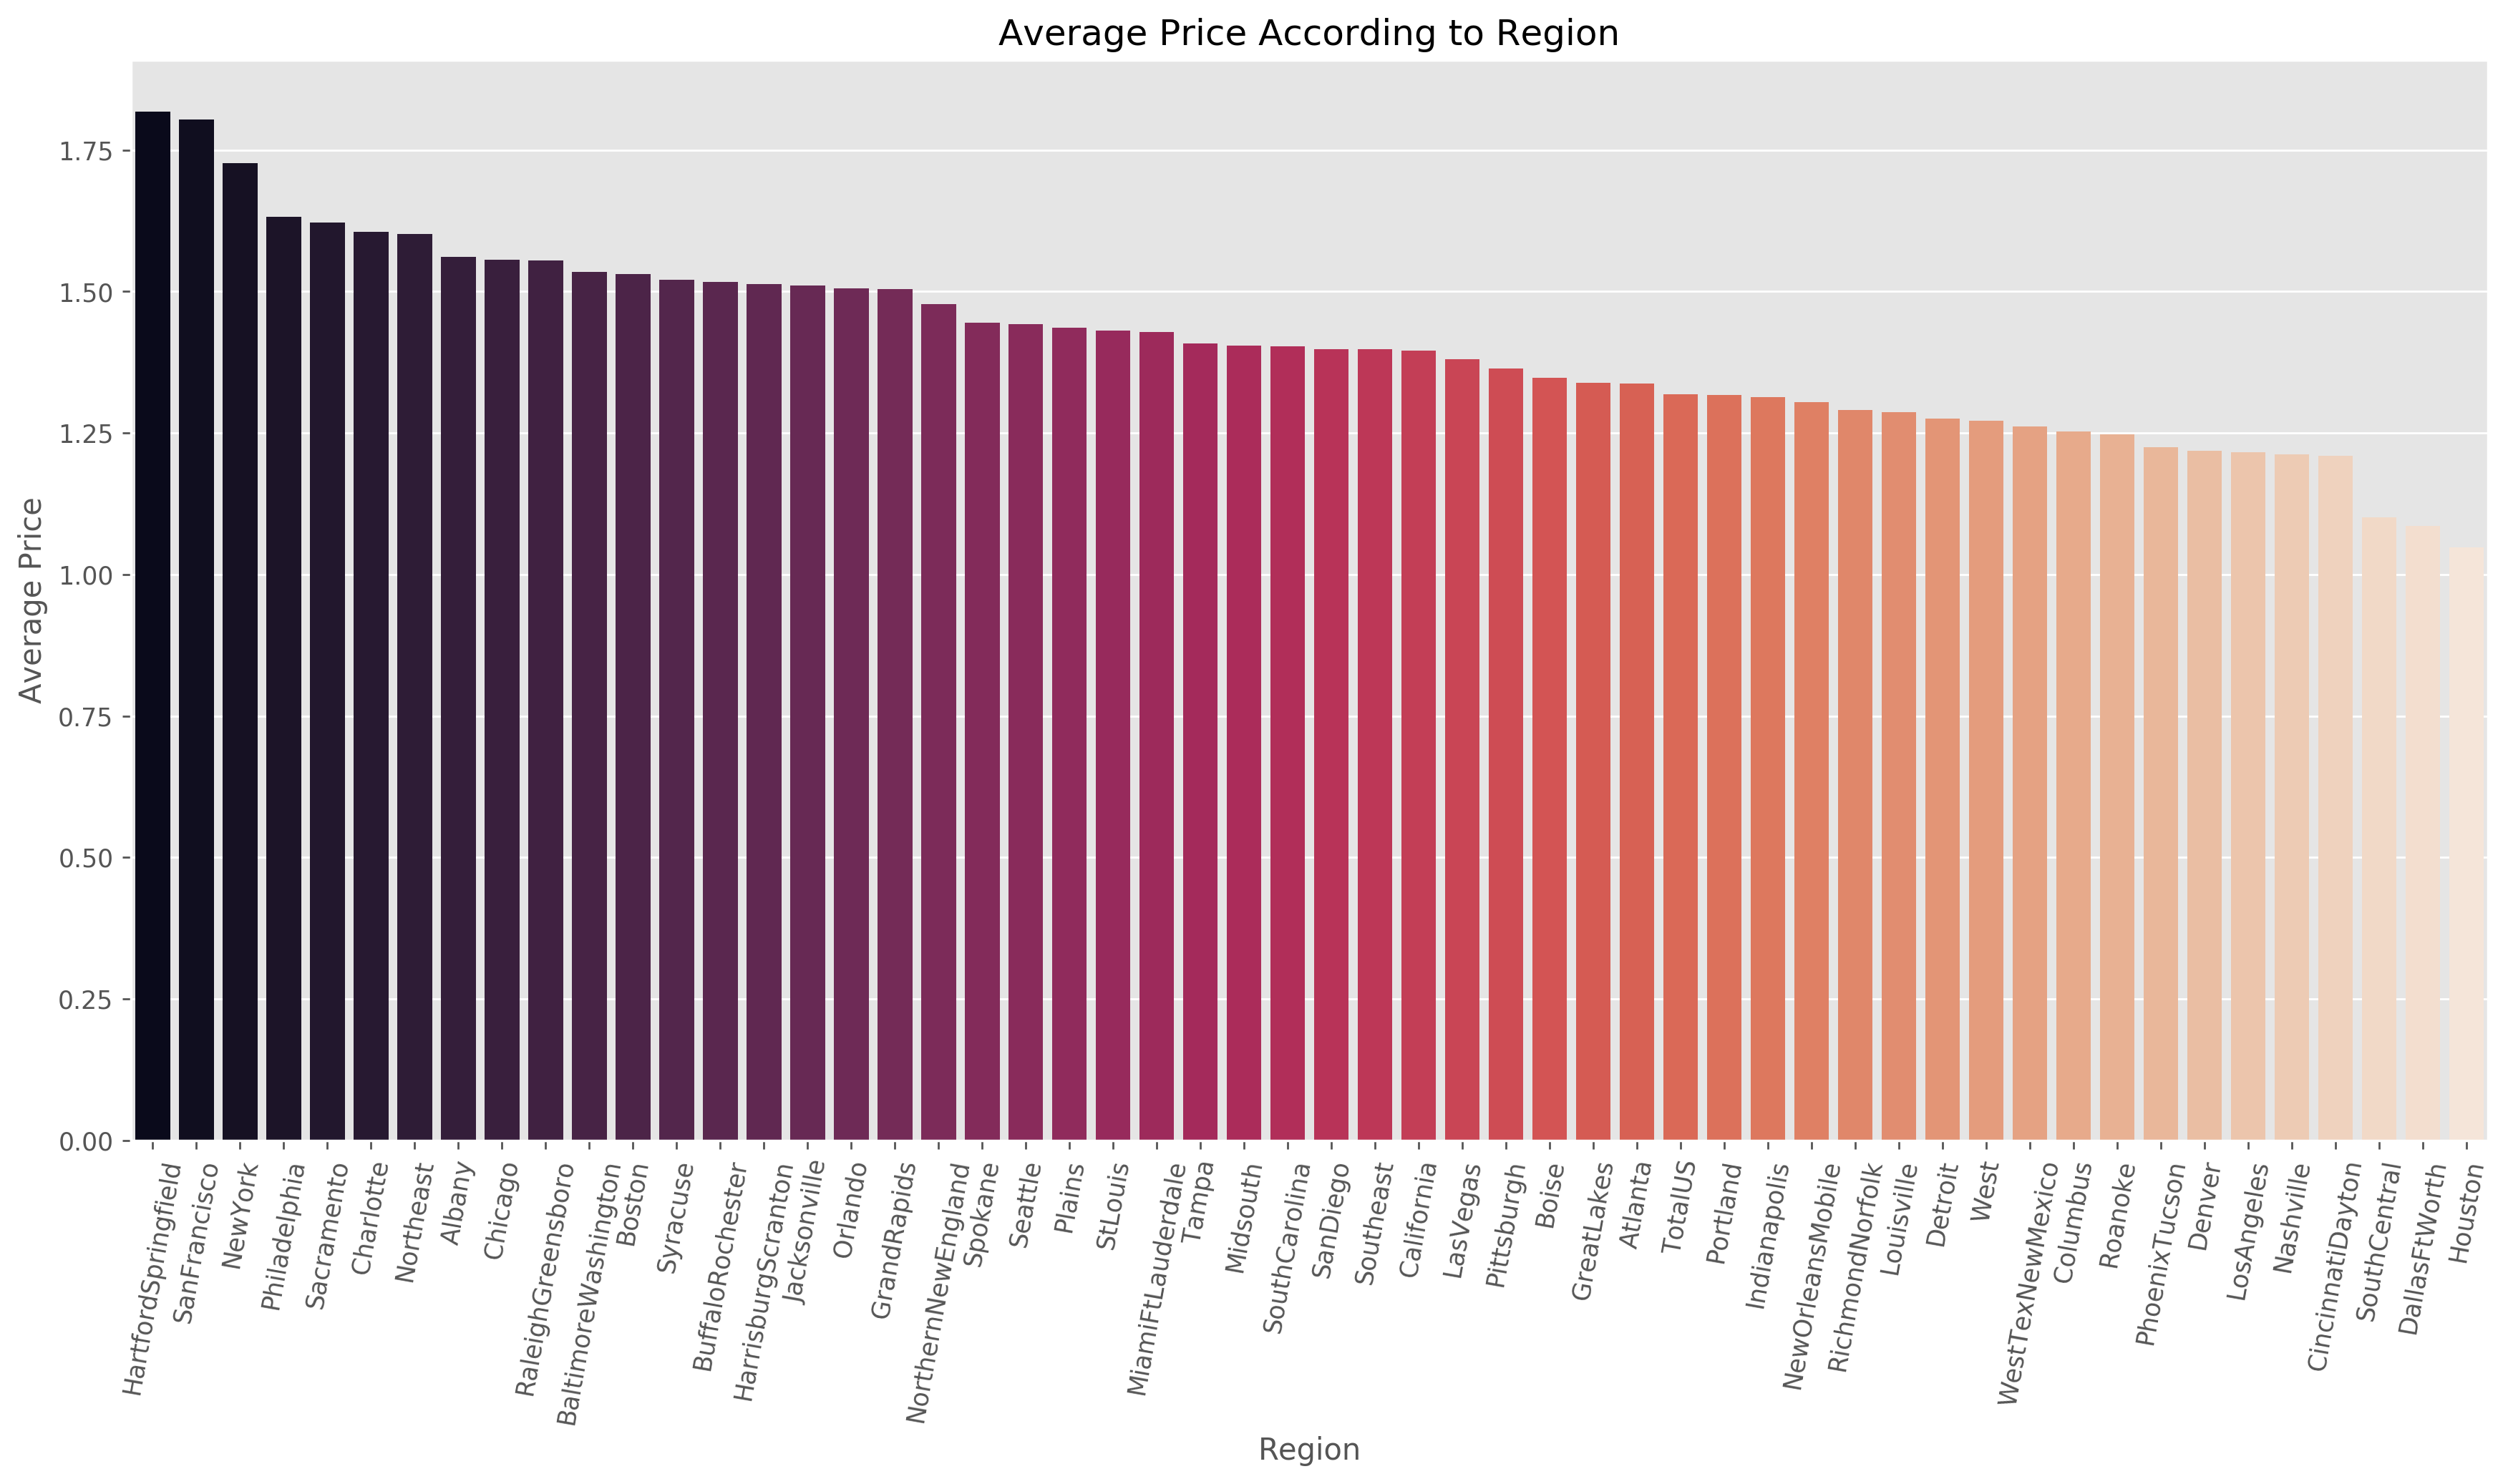

In [28]:
import seaborn as sns

byRegion=original_df.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=250)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='rocket')
plt.xticks(rotation=80)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')
plt.savefig('Avocado_Average-Price-According-to-Region.svg')  

The average price by region shows us that the region seems to be correlated to the price

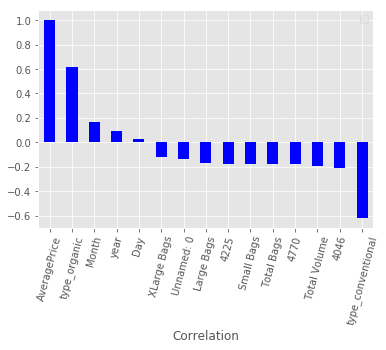

In [15]:
plt.style.use(style='ggplot')
corr = df.corr()
corr_AveragePrice = corr.AveragePrice.sort_values(ascending=False)
corr_AveragePrice.plot(kind='bar', color='blue')
plt.xlabel('Correlation')
plt.ylabel('')
plt.xticks(rotation=75)
plt.legend([])
plt.show()

There is a negative correlation with most of our features

### Creating our models

We define AveragePrice as our target

Then, we split our data set in train and test data sets with a 33% ratio

In [32]:
from sklearn.model_selection import train_test_split
X = df.drop(['AveragePrice'],axis=1)
y = df.AveragePrice
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

In [38]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)

In [39]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(X_train,Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52083.60400895396, tolerance: 17.274871791044774
  positive)


Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('lasso',
                 Lasso(alpha=0.0005, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=1, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [41]:
from sklearn.linear_model import ElasticNet
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(X_train,Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48827.50129071355, tolerance: 17.274871791044774
  positive)


Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True,
                            l1_ratio=0.9, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=3,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

In [42]:
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(X_train,Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


KernelRidge(alpha=0.6, coef0=2.5, degree=2, gamma=None, kernel='polynomial',
            kernel_params=None)

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='huber',
                          max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=5, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Displaying our results

In [ ]:
We calculate the RMSE for each model

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt  
lasso_rmse = sqrt(mean_squared_error(Y_test,lasso.predict(X_test)))
knn_rmse = sqrt(mean_squared_error(Y_test,knn.predict(X_test)))
random_forest_rmse = sqrt(mean_squared_error(Y_test,random_forest.predict(X_test)))
gaussian_rmse = sqrt(mean_squared_error(Y_test,gaussian.predict(X_test)))
decision_tree_rmse = sqrt(mean_squared_error(Y_test,decision_tree.predict(X_test)))
ENet_rmse = sqrt(mean_squared_error(Y_test,ENet.predict(X_test)))
KRR_rmse = sqrt(mean_squared_error(Y_test,KRR.predict(X_test)))
GBoost_rmse = sqrt(mean_squared_error(Y_test,GBoost.predict(X_test)))

In [31]:
models = pd.DataFrame({
    'Model': ['KNN', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree','Lasso','ENet','KernelRidge','GBoost'],
    'Score': [knn_rmse ,random_forest_rmse , gaussian_rmse , decision_tree_rmse ,lasso_rmse ,ENet_rmse ,KRR_rmse ,GBoost_rmse]})
models.sort_values(by='Score', ascending=True)

,Model,Score
7,GBoost,5.875543
1,Random Forest,8.846674
3,Decision Tree,9.555103
0,KNN,10.169920
4,Lasso,14.136006
5,ENet,14.136690
2,Naive Bayes,14.852099
6,KernelRidge,63.189486


### Conclusion

By creating a leaderboard with model by their accuracy, we observe:

   - The Kernel Ridge model is doing extremly bad 
   - The average Rmse (removing the extreme one) is around 10
   - GBoost have the best RMSE (5.87)

We save our processed data set to use it with our Auto-ML models

In [ ]:
df.to_csv('../Data/avocado_price/no_nan_id.csv')